# PREGUNTAS
- ¿Está el modelo sobreentrenado?
- ¿Qué modelo es mejor?

## Martes

In [1]:
# A^-1 no es la inversa, utilizar inv()
# Ruta de csv: ../CSV/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

x = np.array([0.0115, 0.012, 0.012, 0.012, 0.013, 0.0135, 0.026, 0.032, 0.034, 0.038, 0.04, 0.041, 0.084, 0.086, 0.092, 0.098])
y = np.array([50.5, 49, 50.2, 44.5, 48.5, 47.5, 35, 34.5, 38, 31.5, 28, 38.5, 15, 29.5, 20.5, 17])

y_e = np.array([50.5, 50.2, 48.5, 35, 38, 28, 15, 20.5])
y_t = np.array([49, 44.5, 47.5, 34.5, 31.5, 38.5, 29.5, 17])

x_e = np.array([0.0115, 0.012, 0.013, 0.026, 0.034, 0.04, 0.084, 0.092])
x_t = np.array([0.012, 0.012, 0.0135, 0.032, 0.038, 0.041, 0.086, 0.098])

# Create a column of ones with the same length as x_E
ones = np.ones_like(x_e)

[[0.0115 1.    ]
 [0.012  1.    ]
 [0.013  1.    ]
 [0.026  1.    ]
 [0.034  1.    ]
 [0.04   1.    ]
 [0.084  1.    ]
 [0.092  1.    ]]

[-400.33639449   51.35064041]


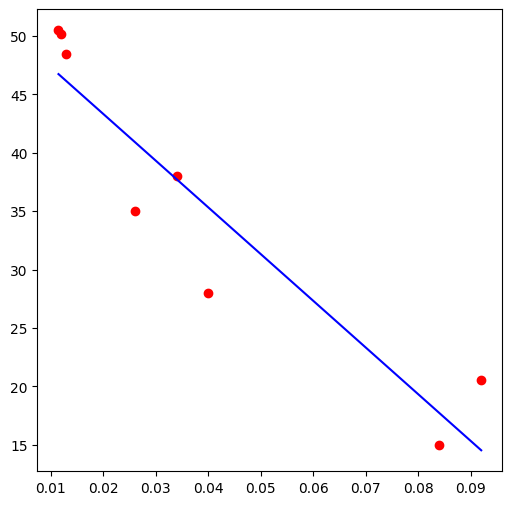

Error cuadrático de entrenamiento: 165.35793634581705
Error cuadrático medio (%) de entrenamiento: 20.66974204322713
Error cuadrático de validación: 245.19919326758145
Error cuadrático medio (%) de validación: 30.64989915844768
Diferencia relativa (dividir): 0.45479115888762883
Percentil: 30.80510065550509


In [2]:
# Stack as two columns: [x_E | 1]
A = np.column_stack((x_e, ones))

# Modelo 1 (y = ax + b)
print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ y_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(x_e), np.max(x_e), 1000)
y_line = a * x_line + b

plt.figure(figsize=(6,6))
plt.plot(x_e, y_e, 'or', x_line, y_line, '-b')
plt.show()

y_ep = a * x_e + b
error_e = (y_e - y_ep) @ (y_e - y_ep).T 
print('Error cuadrático de entrenamiento:', error_e)
print('Error cuadrático medio (%) de entrenamiento:', error_e / 8)
y_tp = a * x_t + b
error_t = (y_t - y_tp) @ (y_t - y_tp).T 
print('Error cuadrático de validación:', error_t)
print('Error cuadrático medio (%) de validación:', error_t / 8)
print('Diferencia relativa (dividir):', error_e**2 / error_t**2)
print('Percentil:', scipy.stats.f.cdf(error_e / error_t, 7, 7) * 100)

[[1.3225e-04 1.0000e+00]
 [1.4400e-04 1.0000e+00]
 [1.6900e-04 1.0000e+00]
 [6.7600e-04 1.0000e+00]
 [1.1560e-03 1.0000e+00]
 [1.6000e-03 1.0000e+00]
 [7.0560e-03 1.0000e+00]
 [8.4640e-03 1.0000e+00]]

[-3538.42332109    44.29196022]


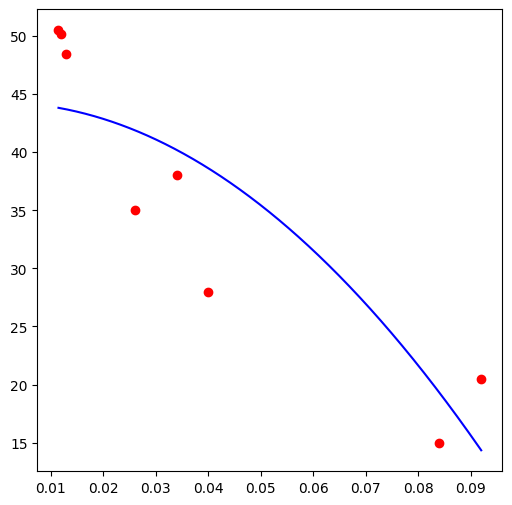

Error cuadrático de entrenamiento: 330.93196047937516
Error cuadrático medio (%) de entrenamiento: 41.366495059921895
Error cuadrático de validación: 313.9136932807565
Error cuadrático medio (%) de validación: 39.23921166009456
Diferencia relativa (dividir): 1.11136548020256
Percentil: 52.68662840391731


In [3]:
# Modelo 2 (y = ax^2 + b)
A = np.column_stack((x_e**2, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ y_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(x_e), np.max(x_e), 1000)
y_line = a * x_line**2 + b

plt.figure(figsize=(6,6))
plt.plot(x_e, y_e, 'or', x_line, y_line, '-b')
plt.show()

y_ep = a * x_e**2 + b
error_e = (y_e - y_ep) @ (y_e - y_ep).T 
print('Error cuadrático de entrenamiento:', error_e)
print('Error cuadrático medio (%) de entrenamiento:', error_e / 8)
y_tp = a * x_t**2 + b
error_t = (y_t - y_tp) @ (y_t - y_tp).T 
print('Error cuadrático de validación:', error_t)
print('Error cuadrático medio (%) de validación:', error_t / 8)
print('Diferencia relativa (dividir):', error_e**2 / error_t**2)
print('Percentil:', scipy.stats.f.cdf(error_e / error_t, 7, 7) * 100)

[[1.3225e-04 1.1500e-02 1.0000e+00]
 [1.4400e-04 1.2000e-02 1.0000e+00]
 [1.6900e-04 1.3000e-02 1.0000e+00]
 [6.7600e-04 2.6000e-02 1.0000e+00]
 [1.1560e-03 3.4000e-02 1.0000e+00]
 [1.6000e-03 4.0000e-02 1.0000e+00]
 [7.0560e-03 8.4000e-02 1.0000e+00]
 [8.4640e-03 9.2000e-02 1.0000e+00]]

[ 6548.16382978 -1074.26930232    61.79909827]


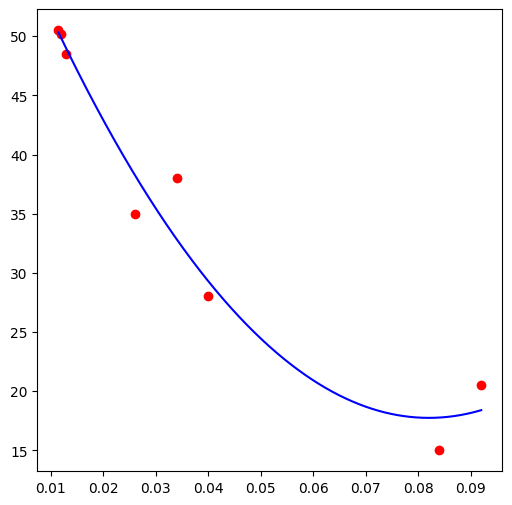

Error cuadrático de entrenamiento: 51.59217211793228
Error cuadrático medio (%) de entrenamiento: 6.449021514741535
Error cuadrático de validación: 268.1609171226087
Error cuadrático medio (%) de validación: 33.520114640326085
Diferencia relativa (dividir): 0.03701490687310082
Percentil: 2.252085691352865


In [4]:
# Modelo 3 (y = ax^2 + bx +c)
A = np.column_stack((x_e**2, x_e, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ y_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b, c = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(x_e), np.max(x_e), 1000)
y_line = a * x_line**2 + b * x_line + c

plt.figure(figsize=(6,6))
plt.plot(x_e, y_e, 'or', x_line, y_line, '-b')
plt.show()

y_ep = a * x_e**2 + b * x_e + c
error_e = (y_e - y_ep) @ (y_e - y_ep).T 
print('Error cuadrático de entrenamiento:', error_e)
print('Error cuadrático medio (%) de entrenamiento:', error_e / 8)
y_tp = a * x_t**2 + b * x_t + c
error_t = (y_t - y_tp) @ (y_t - y_tp).T 
print('Error cuadrático de validación:', error_t)
print('Error cuadrático medio (%) de validación:', error_t / 8)
print('Diferencia relativa (dividir):', error_e**2 / error_t**2)
print('Percentil:', scipy.stats.f.cdf(error_e / error_t, 7, 7) * 100)

[[1.520875e-06 1.322500e-04 1.150000e-02 1.000000e+00]
 [1.728000e-06 1.440000e-04 1.200000e-02 1.000000e+00]
 [2.197000e-06 1.690000e-04 1.300000e-02 1.000000e+00]
 [1.757600e-05 6.760000e-04 2.600000e-02 1.000000e+00]
 [3.930400e-05 1.156000e-03 3.400000e-02 1.000000e+00]
 [6.400000e-05 1.600000e-03 4.000000e-02 1.000000e+00]
 [5.927040e-04 7.056000e-03 8.400000e-02 1.000000e+00]
 [7.786880e-04 8.464000e-03 9.200000e-02 1.000000e+00]]

[ 1.16002032e+05 -9.68262312e+03 -4.90255121e+02  5.66228337e+01]


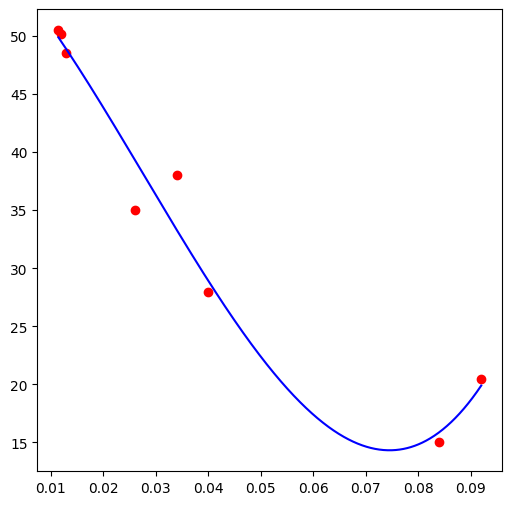

Error cuadrático de entrenamiento: 43.9637970629525
Error cuadrático medio (%) de entrenamiento: 5.495474632869063
Error cuadrático de validación: 359.3227662983854
Error cuadrático medio (%) de validación: 44.91534578729817
Diferencia relativa (dividir): 0.014969969654445945
Percentil: 0.6389470704319283


In [5]:
# Modelo 4 (y = ax^3 + bx^2 +cx + d)
A = np.column_stack((x_e**3, x_e**2, x_e, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ y_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b, c, d = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(x_e), np.max(x_e), 1000)
y_line = a * x_line**3 + b * x_line**2 + c *x_line + d

plt.figure(figsize=(6,6))
plt.plot(x_e, y_e, 'or', x_line, y_line, '-b')
plt.show()

y_ep = a * x_e**3 + b * x_e**2 + c * x_e + d
error_e = (y_e - y_ep) @ (y_e - y_ep).T 
print('Error cuadrático de entrenamiento:', error_e)
print('Error cuadrático medio (%) de entrenamiento:', error_e / 8)
y_tp = a * x_t**3 + b * x_t **2 + c * x_t + d
error_t = (y_t - y_tp) @ (y_t - y_tp).T 
print('Error cuadrático de validación:', error_t)
print('Error cuadrático medio (%) de validación:', error_t / 8)
print('Diferencia relativa (dividir):', error_e**2 / error_t**2)
print('Percentil:', scipy.stats.f.cdf(error_e / error_t, 7, 7) * 100)

[[1.74900625e-08 1.52087500e-06 1.32250000e-04 1.15000000e-02
  1.00000000e+00]
 [2.07360000e-08 1.72800000e-06 1.44000000e-04 1.20000000e-02
  1.00000000e+00]
 [2.85610000e-08 2.19700000e-06 1.69000000e-04 1.30000000e-02
  1.00000000e+00]
 [4.56976000e-07 1.75760000e-05 6.76000000e-04 2.60000000e-02
  1.00000000e+00]
 [1.33633600e-06 3.93040000e-05 1.15600000e-03 3.40000000e-02
  1.00000000e+00]
 [2.56000000e-06 6.40000000e-05 1.60000000e-03 4.00000000e-02
  1.00000000e+00]
 [4.97871360e-05 5.92704000e-04 7.05600000e-03 8.40000000e-02
  1.00000000e+00]
 [7.16392960e-05 7.78688000e-04 8.46400000e-03 9.20000000e-02
  1.00000000e+00]]

[ 5.76222094e+06 -1.10894530e+06  7.66810681e+04 -2.72866009e+03
  7.33420142e+01]


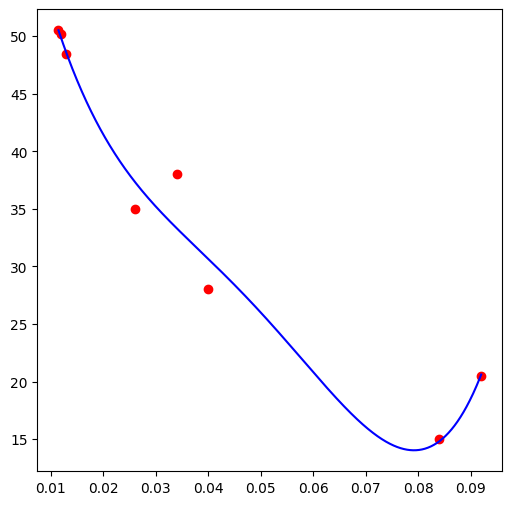

Error cuadrático de entrenamiento: 34.776898240419264
Error cuadrático medio (%) de entrenamiento: 4.347112280052408
Error cuadrático de validación: 462.2630107003863
Error cuadrático medio (%) de validación: 57.78287633754829
Diferencia relativa (dividir): 0.0752318429885357
Percentil: 0.14677332925973594


In [6]:
# Modelo 5 (y = ax^4 + bx^3 +cx^2 + dx + e)
A = np.column_stack((x_e**4, x_e**3, x_e**2, x_e, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ y_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b, c, d, e = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(x_e), np.max(x_e), 1000)
y_line = a * x_line**4 + b * x_line**3 + c * x_line**2 + d * x_line + e

plt.figure(figsize=(6,6))
plt.plot(x_e, y_e, 'or', x_line, y_line, '-b')
plt.show()

y_ep = a * x_e**4 + b * x_e**3 + c * x_e**2 + d * x_e + e
error_e = (y_e - y_ep) @ (y_e - y_ep).T 
print('Error cuadrático de entrenamiento:', error_e)
print('Error cuadrático medio (%) de entrenamiento:', error_e / 8)
y_tp = a * x_t**4 + b * x_t **3 + c * x_t**2 + d * x_t + e
error_t = (y_t - y_tp) @ (y_t - y_tp).T 
print('Error cuadrático de validación:', error_t)
print('Error cuadrático medio (%) de validación:', error_t / 8)
print('Diferencia relativa (dividir):', error_e / error_t)
print('Percentil:', scipy.stats.f.cdf(error_e / error_t, 7, 7) * 100)

## Miércoles (a)

In [7]:
# A^-1 no es la inversa, utilizar inv()
# Ruta de csv: ../CSV/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

df = pd.read_csv('../CSV/data_temperature_pressure_humidity.csv', decimal=',', sep=';')
display(df.head(df.size))

t = np.array(df.Temperature.values)
h = np.array(df.Humidity.values)     # Normalizar
p = np.array(df.Pressure.values)     # Normalizar

h_norm = (h - h.mean()) / h.std()    # Normalizados
p_norm = (p - p.mean()) / p.std()    # Normalizados

AA = np.stack((h_norm, p_norm, t), axis=1)         # Creación de matrices
print(AA)

# Barajar los índices de las filas
np.random.seed(50)
indices = np.random.permutation(AA.shape[0])
# Mitad del tamaño
mitad = AA.shape[0] // 2
# Primera mitad (bloque 1) y segunda mitad (bloque 2)
AA_e = AA[indices[:mitad]]
AA_t = AA[indices[mitad:]]

print("\nBloque entrenamiento (A_e):\n", AA_e)
print("\nBloque test (A_t):\n", AA_t)

h_e = AA_e[:, 0]
h_t = AA_t[:, 0]
p_e = AA_e[:, 1]
p_t = AA_t[:, 1]
t_e = AA_e[:, 2]
t_t = AA_t[:, 2]
ones = np.ones_like(h_e)

,Humidity,Pressure,Temperature
0,0.006993,1018.41577,8.393457
1,0.006736,1019.81128,8.620356
2,0.006697,1021.31366,9.361292
3,0.006370,1022.71802,10.435968
4,0.006117,1023.69019,11.233515
...,...,...,...
1111,0.005167,1010.14575,14.628382
1112,0.005631,1010.70276,13.815973
1113,0.006095,1011.71454,13.298029
1114,0.006099,1012.48877,12.857996


[[-1.10649869  0.75121222  8.39345741]
 [-1.22462443  0.94438465  8.62035561]
 [-1.24224913  1.15235048  9.36129189]
 ...
 [-1.51902468 -0.17640053 13.2980289 ]
 [-1.51696459 -0.06922832 12.857996  ]
 [-1.51257437  0.03812107 12.5229435 ]]

Bloque entrenamiento (A_e):
 [[-8.14311919e-01  7.09255831e-01  2.01212101e+01]
 [-1.07306660e-02 -3.43340177e-01  1.62708073e+01]
 [-1.23898264e+00  2.34687702e+00  1.26142826e+01]
 ...
 [-2.83286972e-03 -5.51145433e-01  2.08164005e+01]
 [-8.42754180e-01 -5.58259055e-01  1.79612370e+01]
 [ 3.69574538e-01 -1.88051271e+00  1.80863285e+01]]

Bloque test (A_t):
 [[ 0.96227205 -0.26821318 20.5692387 ]
 [ 1.52058351 -0.31549199 24.9744205 ]
 [ 0.27847297 -1.55353773 16.7170048 ]
 ...
 [ 0.14194185  0.57931422 14.085413  ]
 [-0.40793269 -0.63103561 15.1970463 ]
 [-1.15866511  0.420208   14.6859989 ]]


[[-0.81431192  0.70925583  1.        ]
 [-0.01073067 -0.34334018  1.        ]
 [-1.23898264  2.34687702  1.        ]
 ...
 [-0.00283287 -0.55114543  1.        ]
 [-0.84275418 -0.55825906  1.        ]
 [ 0.36957454 -1.88051271  1.        ]]

[ 1.92116743 -0.05355636 17.64302737]


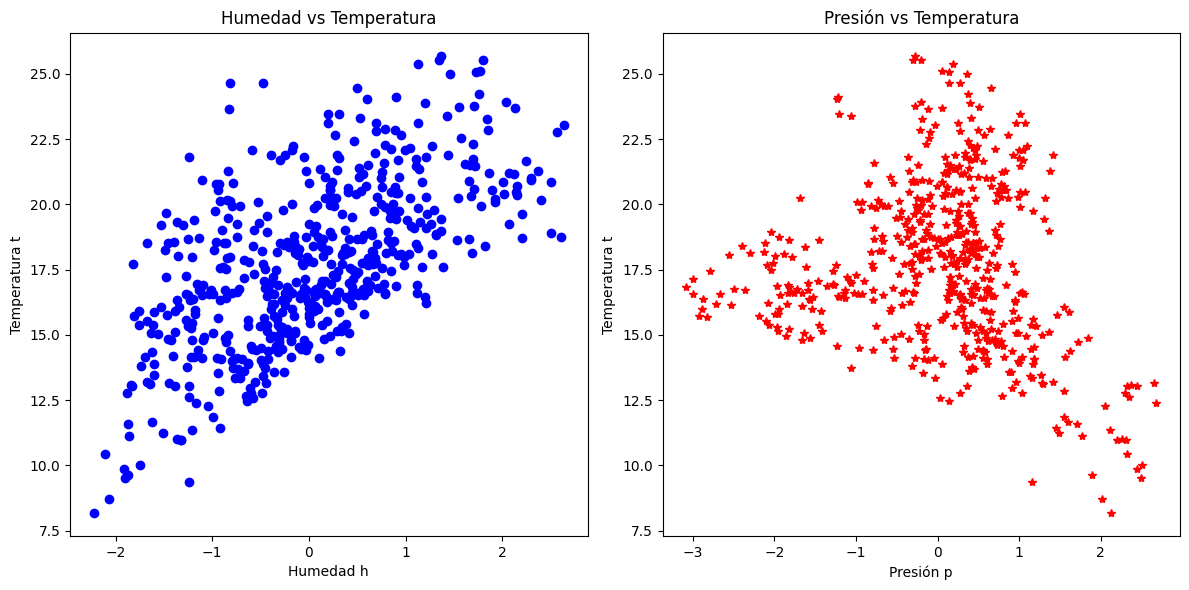

1.9211674323644385 -0.053556357645316674 17.64302737210874

Error cuadrático de entrenamiento: 3243.322322741884
Error cuadrático medio (%) de entrenamiento: 5.81240559631162

Error cuadrático de validación: 3404.605838414965
Error cuadrático medio (%) de validación: 6.101444154865529

Diferencia relativa (dividir): 0.9526278449466069
Percentil: 28.352522199106545


In [8]:
# Modelo 1 (t = ah + bp + c)
A = np.column_stack((h_e, p_e, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ t_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b, c = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min([np.min(h_e), np.min(p_e)]), np.max([np.max(h_e), np.max(p_e)]), 1000)
y_line = a * h_e + b * p_e + c

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Humedad vs Temperatura
ax1.set(xlabel="Humedad h", ylabel="Temperatura t", title="Humedad vs Temperatura")
ax1.plot(h_e, t_e, 'ob')
# Gráfico 2: Presión vs Temperatura
ax2.set(xlabel="Presión p", ylabel="Temperatura t", title="Presión vs Temperatura")
ax2.plot(p_e, t_e, '*r')

plt.tight_layout()
plt.show()

print(a, b, c, end='\n\n')

t_ep = a * h_e + b * p_e + c
error_e1 = (t_e - t_ep) @ (t_e - t_ep).T 
print('Error cuadrático de entrenamiento:', error_e1)
print('Error cuadrático medio (%) de entrenamiento:', error_e1 / len(ones), end='\n\n')

t_tp = a * h_t + b * p_t + c
error_t1 = (t_t - t_tp) @ (t_t - t_tp).T 
print('Error cuadrático de validación:', error_t1)
print('Error cuadrático medio (%) de validación:', error_t1 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e1 / error_t1)
print('Percentil:', scipy.stats.f.cdf(error_e1 / error_t1, len(ones) - 1, len(ones) - 1) * 100)

[[-0.81431192  1.        ]
 [-0.01073067  1.        ]
 [-1.23898264  1.        ]
 ...
 [-0.00283287  1.        ]
 [-0.84275418  1.        ]
 [ 0.36957454  1.        ]]

[ 1.93447737 17.64125605]
1.9344773742091257 17.641256047804802



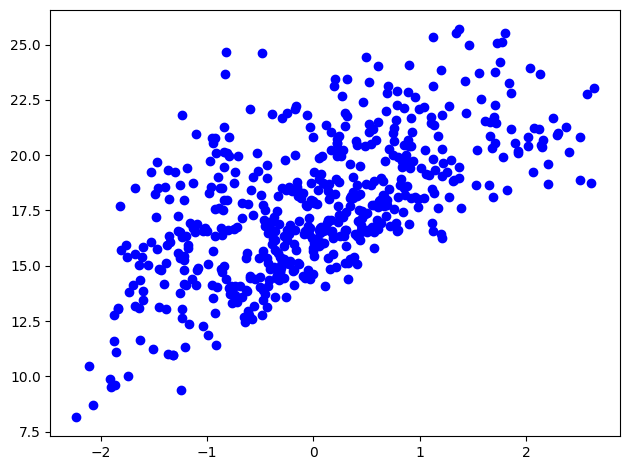

Error cuadrático de entrenamiento: 3244.9439637292917
Error cuadrático medio (%) de entrenamiento: 5.81531176295572

Error cuadrático de validación: 3407.9376671630707
Error cuadrático medio (%) de validación: 6.107415174127367

Diferencia relativa (dividir): 7.019692012157312
Percentil: 99.99999999999999


In [9]:
# Modelo 2 (t = ah + b)
A = np.column_stack((h_e, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ t_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(h_e), np.max(h_e), len(ones))
y_line = a * h_e + b 

print(a, b, end='\n\n')
plt.plot(h_e, t_e, 'ob')
plt.tight_layout()
plt.show()

t_ep = a * h_e + b
error_e2 = (t_e - t_ep) @ (t_e - t_ep).T 
print('Error cuadrático de entrenamiento:', error_e2)
print('Error cuadrático medio (%) de entrenamiento:', error_e2 / len(ones), end='\n\n')

t_tp = a * h_t + b
error_t2 = (t_t - t_tp) @ (t_t - t_tp).T 
print('Error cuadrático de validación:', error_t2)
print('Error cuadrático medio (%) de validación:', error_t2 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e2 / error_t)
print('Percentil:', scipy.stats.f.cdf(error_e2 / error_t, len(ones) - 1, len(ones) -1 ) * 100)

[[ 0.70925583  1.        ]
 [-0.34334018  1.        ]
 [ 2.34687702  1.        ]
 ...
 [-0.55114543  1.        ]
 [-0.55825906  1.        ]
 [-1.88051271  1.        ]]

[-0.50096009 17.69741048]
-0.5009600899000545 17.697410480343923



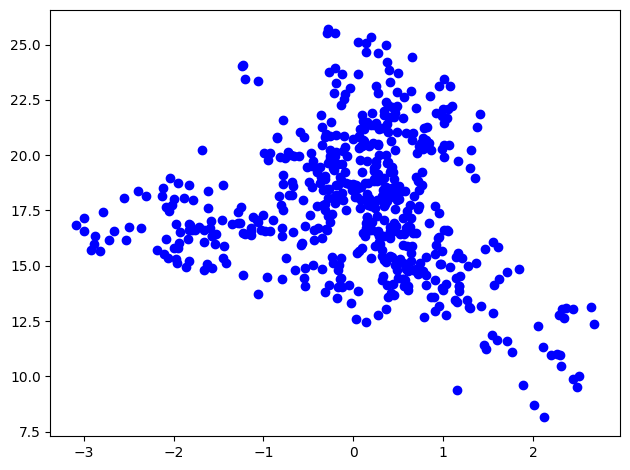

Error cuadrático de entrenamiento: 5198.707597142636
Error cuadrático medio (%) de entrenamiento: 9.316680281617627

Error cuadrático de validación: 5018.459337492803
Error cuadrático medio (%) de validación: 8.993654726689611

Diferencia relativa (dividir): 1.0359170509369682
Percentil: 66.1369918879792


In [10]:
# Modelo 3 (t = ap + b)
A = np.column_stack((p_e, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ t_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(p_e), np.max(p_e), len(ones))
y_line = a * p_e + b 

print(a, b, end='\n\n')
plt.plot(p_e, t_e, 'ob')
plt.tight_layout()
plt.show()

t_ep = a * p_e + b
error_e3 = (t_e - t_ep) @ (t_e - t_ep).T 
print('Error cuadrático de entrenamiento:', error_e3)
print('Error cuadrático medio (%) de entrenamiento:', error_e3 / len(ones), end='\n\n')

t_tp = a * p_t + b
error_t3 = (t_t - t_tp) @ (t_t - t_tp).T 
print('Error cuadrático de validación:', error_t3)
print('Error cuadrático medio (%) de validación:', error_t3 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e3 / error_t3)
print('Percentil:', scipy.stats.f.cdf(error_e3 / error_t3, len(ones) - 1, len(ones) - 1) * 100)

In [11]:
print('Percentil entre validación de modelos 1 y 2:', scipy.stats.f.cdf(error_t1 / error_t2, len(ones) - 1, len(ones) - 1) * 100)
# Si sale cerca del 50%, son similares
# Si sale muy alto o muy bajo, HAY diferenciar significativas entre los modelos (2.5-97.5)
print('Percentil entre validación de modelos 1 y 3:', scipy.stats.f.cdf(error_t1 / error_t3, len(ones) - 1, len(ones) - 1) * 100)

Percentil entre validación de modelos 1 y 2: 49.53973652574565
Percentil entre validación de modelos 1 y 3: 0.0002530890306973473


## Miércoles (b)

In [20]:
# A^-1 no es la inversa, utilizar inv()
# Ruta de csv: ../CSV/

# ¿QUÉ VARIABLE ES MÁS IMPORTANTE?
# ¿LA EDUCACIÓN ES PRESCINDIBLE?

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

df = pd.read_csv('../CSV/life_expectancy_limpio.csv', sep=';', decimal=',')
display(df.head())

le = np.array(df['Life Expectancy World Bank'].values)    # Normalizar
co = np.array(df['CO2'].values)                           # Normalizar
he = np.array(df['Health Expenditure %'].values)          # Normalizar
ee = np.array(df['Education Expenditure %'].values)       # Normalizar

le_norm = (le - le.mean()) / le.std()                     # Normalizados
co_norm = (co - co.mean()) / co.std()                     # Normalizados

AA = np.stack((co, he, ee, le), axis=1)                   # Creación de matrices
print(AA)

# Barajar los índices de las filas
np.random.seed(40)
indices = np.random.permutation(AA.shape[0])
# Mitad del tamaño
mitad = AA.shape[0] // 2
# Primera mitad (bloque 1) y segunda mitad (bloque 2)
AA_e = AA[indices[:mitad]]
AA_t = AA[indices[mitad:]]

print("\nBloque entrenamiento (A_e):\n", AA_e)
print("\nBloque test (A_t):\n", AA_t)

co_e = AA_e[:, 0]
co_t = AA_t[:, 0]
he_e = AA_e[:, 1]
he_t = AA_t[:, 1]
ee_e = AA_e[:, 2]
ee_t = AA_t[:, 2]
le_e = AA_e[:, 3]
le_t = AA_t[:, 3]
ones = np.ones_like(le_e)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Injuries,Communicable,NonCommunicable
0,Sao Tome and Principe,STP,Sub-Saharan Africa,Lower middle income,2003,63.359,11.2,70.000000,12.617824,3.24693,16.360001,3268.34,36798.71,24566.31
1,Sao Tome and Principe,STP,Sub-Saharan Africa,Lower middle income,2005,64.659,9.0,79.999998,11.516304,4.85645,16.469999,3303.50,35858.70,24876.27
2,Sao Tome and Principe,STP,Sub-Saharan Africa,Lower middle income,2002,62.687,12.8,59.999999,10.662792,2.72058,17.629999,3781.09,36011.64,25804.54
3,Sao Tome and Principe,STP,Sub-Saharan Africa,Lower middle income,2004,64.020,9.8,70.000000,11.869797,3.23471,16.120001,3888.15,33050.62,26464.67
4,Sao Tome and Principe,STP,Sub-Saharan Africa,Lower middle income,2006,65.270,9.0,79.999998,8.276708,4.27118,16.650000,3832.71,31177.03,26649.59


[[7.00000003e+01 1.26178236e+01 3.24692988e+00 6.33590000e+01]
 [7.99999982e+01 1.15163040e+01 4.85645008e+00 6.46590000e+01]
 [5.99999987e+01 1.06627922e+01 2.72058010e+00 6.26870000e+01]
 ...
 [1.00960098e+07 5.06592178e+00 3.66744995e+00 7.64700000e+01]
 [1.05029297e+07 5.16790485e+00 3.54249000e+00 7.67040000e+01]
 [1.07072197e+07 5.35027790e+00 3.53999996e+00 7.69120000e+01]]

Bloque entrenamiento (A_e):
 [[2.16800003e+04 5.88520575e+00 2.49751997e+00 7.25230000e+01]
 [6.29999995e+02 6.37864399e+00 5.81677008e+00 4.33720000e+01]
 [6.35200005e+04 5.23467541e+00 5.11831570e+00 7.62180000e+01]
 ...
 [3.65000009e+03 4.11143351e+00 3.80152011e+00 5.75090000e+01]
 [4.91199989e+04 7.26602364e+00 4.08121014e+00 7.68940000e+01]
 [1.40000001e+02 4.32168341e+00 5.60338020e+00 6.98690000e+01]]

Bloque test (A_t):
 [[7.60599976e+04 7.11508703e+00 5.67253017e+00 8.17048781e+01]
 [4.98699989e+04 9.73071671e+00 5.12333012e+00 8.04707317e+01]
 [1.30200005e+04 5.84418154e+00 4.82572985e+00 7.105609

In [27]:
# Modelo 1 (le = a*co + b*he + c*ee + d)
A = np.column_stack((co_e, he_e, ee_e, ones))
resultado = np.linalg.inv(A.T @ A) @ A.T @ le_e

# Coeficientes de la recta utilizando el resultado dado
a, b, c, d = resultado
print(a, b, c, d)
print('La variable más importante es: ', np.max(np.abs([a, b, c], 'El término independiente d no se cuenta')), end='\n\n')

# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min([np.min(co_e), np.min(he_e), np.min(ee_e)]), np.max([np.max(co_e), np.max(he_e), np.max(ee_e)]), 1000)
y_line = a * co_e + b * he_e + c * ee_e + d

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

# Gráfico 1: Humedad vs Temperatura
ax1.set(xlabel="C02 co", ylabel="Life Expectancy le", title="C02 vs Life Expectancy")
ax1.plot(co_e, le_e, 'ob')
# Gráfico 2: Presión vs Temperatura
ax2.set(xlabel="Health Expenditure he", ylabel="Life Expectancy le", title="Health Expenditure vs Life Expectancy")
ax2.plot(he_e, le_e, '*r')
# Gráfico 2: Presión vs Temperatura
ax3.set(xlabel="Education Expenditure ee", ylabel="Life Expectancy le", title="Education Expenditure vs Life Expectancy")
ax3.plot(ee_e, le_e, 'xg')

plt.tight_layout()
plt.show()

le_ep = a * co_e + b * he_e + c * ee_e + d
error_e1 = np.sum((le_e - le_ep)**2) / len(le_e)  
print('Error cuadrático de entrenamiento:', error_e1)
print('Error cuadrático medio (%) de entrenamiento:', error_e1 / len(ones), end='\n\n')

le_tp = a * co_t + b * he_t + c * ee_t + d
error_t1 = np.sum((le_t - le_tp)**2) / len(le_t) 
print('Error cuadrático de validación:', error_t1)
print('Error cuadrático medio (%) de validación:', error_t1 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e1 / error_t1)
print('Percentil:', scipy.stats.f.cdf(error_e1 / error_t1, len(ones) - 1, len(ones) - 1) * 100)

1.7204307797671885e-06 1.0606702925621936 0.9147755259849932 59.42583751988385


TypeError: return arrays must be of ArrayType

In [ ]:
# Modelo 2 (le = a*he + b*ee + c)
A = np.column_stack((he_e, ee_e, ones))
resultado = np.linalg.inv(A.T @ A) @ A.T @ le_e

# Coeficientes de la recta utilizando el resultado dado
a, b, c = resultado
print(a, b, c)
print('La variable más importante es: ', np.max(np.abs([a, b, c])), end='\n\n')

# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min([np.min(he_e), np.min(ee_e)]), np.max([np.max(he_e), np.max(ee_e)]), 1000)
y_line = a * he_e + b * ee_e + c

print(a, b, c, end='\n\n')

le_ep = a * he_e + b * ee_e + c
error_e2 = np.sum((le_e - le_ep)**2) / len(le_e) 
print('Error cuadrático de entrenamiento:', error_e2)
print('Error cuadrático medio (%) de entrenamiento:', error_e2 / len(ones), end='\n\n')

le_tp = a * he_t + b * ee_t + c
error_t2 = np.sum((le_t - le_tp)**2) / len(le_t) 
print('Error cuadrático de validación:', error_t2)
print('Error cuadrático medio (%) de validación:', error_t2 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e2 / error_t2)
print('Percentil:', scipy.stats.f.cdf(error_e2 / error_t2, len(ones) - 1, len(ones) - 1) * 100)

In [ ]:
# Modelo 3 (le = a*co + b*he + c)
A = np.column_stack((co_e, he_e, ones))
resultado = np.linalg.inv(A.T @ A) @ A.T @ le_e
# Coeficientes de la recta utilizando el resultado dado
a, b, c = resultado
print(a, b, c)

# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min([np.min(he_e), np.min(co_e)]), np.max([np.max(he_e), np.max(co_e)]), 1000)
y_line = a * co_e + b * he_e + c

print(a, b, c, end='\n\n')

le_ep = a * co_e + b * he_e + c
error_e3 = np.sum((le_e - le_ep)**2) / len(le_e) 
print('Error cuadrático de entrenamiento:', error_e3)
print('Error cuadrático medio (%) de entrenamiento:', error_e3 / len(ones), end='\n\n')

le_tp = a * co_t + b * he_t + c
error_t3 = np.sum((le_t - le_tp)**2) / len(le_t) 
print('Error cuadrático de validación:', error_t1)
print('Error cuadrático medio (%) de validación:', error_t3 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e3 / error_t3)
print('Percentil:', scipy.stats.f.cdf(error_e3 / error_t3, len(ones) - 1, len(ones) - 1) * 100, end='\n\n')

In [28]:
# Modelo 4 (le = a*co + b*ee + c)
A = np.column_stack((co_e, ee_e, ones))
resultado = np.linalg.inv(A.T @ A) @ A.T @ le_e

# Coeficientes de la recta utilizando el resultado dado
a, b, c = resultado
print(a, b, c)

# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min([np.min(ee_e), np.min(co_e)]), np.max([np.max(ee_e), np.max(co_e)]), 1000)
y_line = a * co_e + b * ee_e + c

print(a, b, c, end='\n\n')

le_ep = a * co_e + b * ee_e + c
error_e4 = np.sum((le_e - le_ep)**2) / len(le_e) 
print('Error cuadrático de entrenamiento:', error_e4)
print('Error cuadrático medio (%) de entrenamiento:', error_e4 / len(ones), end='\n\n')

le_tp = a * co_t + b * ee_t + c
error_t4 = np.sum((le_t - le_tp)**2) / len(le_t) 
print('Error cuadrático de validación:', error_t4)
print('Error cuadrático medio (%) de validación:', error_t4 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e4 / error_t4)
print('Percentil:', scipy.stats.f.cdf(error_e4 / error_t4, len(ones) - 1, len(ones) - 1) * 100, end='\n\n')

1.7589038299971209e-06 1.30353726105839 64.34708529644611
1.7589038299971209e-06 1.30353726105839 64.34708529644611

Error cuadrático de entrenamiento: 76.24417750212237
Error cuadrático medio (%) de entrenamiento: 0.0819829865614219

Error cuadrático de validación: 78.19459178112825
Error cuadrático medio (%) de validación: 0.08408020621626694

Diferencia relativa (dividir): 0.9750569158994369
Percentil: 35.017842897052255



In [29]:
print('Percentil entre validación de modelos 1 y 2 (drop co):', scipy.stats.f.cdf(error_t1 / error_t2, len(ones) - 1, len(ones) - 1) * 100)
print('Percentil entre validación de modelos 1 y 3 (drop ee):', scipy.stats.f.cdf(error_t1 / error_t3, len(ones) - 1, len(ones) - 1) * 100)
print('Percentil entre validación de modelos 1 y 4 (drop he):', scipy.stats.f.cdf(error_t1 / error_t4, len(ones) - 1, len(ones) - 1) * 100)
print('''Dejar caer co o ee no muestra diferencias significativas.
Dejar caer he hace que el modelo empeore MUCHO, corroborando con que he era la VARIABLE MÁS IMPORTANTE
''')

Percentil entre validación de modelos 1 y 2 (drop co): 46.662997869851786
Percentil entre validación de modelos 1 y 3 (drop ee): 54.75504038769665
Percentil entre validación de modelos 1 y 4 (drop he): 3.820036119430653
Dejar caer co o ee no muestra diferencias significativas.
Dejar caer he hace que el modelo empeore MUCHO, corroborando con que he era la VARIABLE MÁS IMPORTANTE

